
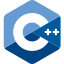
<br>

<div style="text-align:center; font-size:200%;">
 <b>Kopieren von Objekten</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 10 Kopieren von Objekten.ipynb -->
<!-- slides/module_150_classes/topic_163_copy_construction.cpp -->


## Kopierkonstruktor

- Bisher: Konstruktion aus Werten für die Member-Variablen.
- Wir würden gerne Objekte aus anderen Objekten konstruieren.
- Das geht mit dem Kopierkonstruktor.

In [ ]:
#include <iostream>
#include "print.h"

In [ ]:
struct S2 {
    int m1;
    int m2;


    S2(int m1 = 11, int m2 = 22) : m1{m1}, m2{m2} {
        std::cout << "S2(" << m1 << ", " << m2 << ") " << addr(*this) << "\n";
    }

    S2(const S2& other) : m1{other.m1}, m2{other.m2} {
        std::cout << "S2(const S2&) " << addr(*this) << " <- " << addr(other) << "\n";
    }

    S2& operator=(const S2& other) {
        m1 = other.m1;
        m2 = other.m2;
        std::cout << "operator=(const S2&) " << addr(*this) << " <- " << addr(other) << "\n";
        return *this;
    }
};

In [ ]:
S2 s1{2, 4};

In [ ]:
print("S2", s1);

In [ ]:
S2 s2{s1.m1, s1.m2};

In [ ]:
print("S2", s2);

In [ ]:
S2 s3{s1};

In [ ]:
print("S2", s3);

In [ ]:
S2 s4{};

In [ ]:
print("S2", s4);

In [ ]:
s4 = s1;

In [ ]:
print("S2", s4);


- Der Kopierkonstruktor wird aufgerufen, wenn ein Objekt aus einem anderen
  Objekt des gleichen Typs konstruiert wird.
- Er ist durch den Parametertyp `const T&` gekennzeichnet.


## Kopierzuweisungsoperator

- Mit dem Kopierkonstruktor können wir definieren, wie die Konstruktion eines
  neuen Objekts aus einem bestehenden erfolgt.
- Das sollten wir auch für die Zuweisung von Objekten tun können.
- Das geht mit dem Kopierzuweisungsoperator (Copy Assignment Operator).


- Der Kopierzuweisungsoperator wird aufgerufen, wenn ein Objekt einem anderen
  zugewiesen wird.
- Er ist durch die Signatur `T& operator=(const T&)` gekennzeichnet.
- Er gibt eine Referenz auf das Objekt zurück, dem neue Attribut-Werte
  zugewiesen wurden.


- In C++ können wir mehrere Zuweisungen hintereinander schreiben:

In [ ]:
S2 s4, s5;

In [ ]:
print("S2: s3", s3);
print("S2: s4", s4);
print("S2: s5", s5);

In [ ]:
s5 = s4 = s3;

In [ ]:
print("S2: s3", s3);
print("S2: s4", s4);
print("S2: s5", s5);


- Der Zuweisungsoperator wird von rechts nach links ausgewertet.
- Daher muss das Ergebnis der Zuweisung `s4 = s3` ein Objekt sein, das an
  `s5` zugewiesen werden kann.


- Wir können auch destruktive Operationen auf dem Ergebnis einer Zuweisung
  ausführen:

In [ ]:
s3.m1 = 12;

In [ ]:
++(s4 = s3).m1;

In [ ]:
print("S2: s3", s3);
print("S2: s4", s4);


## Kopierkonstruktor und Kopierzuweisungsoperator

- Wann immer eine Klasse einen benutzerdefinierten Kopierkonstruktor hat
  sollte sie auch einen benutzerdefinierten Kopierzuweisungsoperator haben,
  und umgekehrt.
- Sie sollte dann auch einen Destruktor haben (siehe später).


## Workshop: Kopieren von Objekten

Gegeben seien die folgenden Structs `MyStruct` und `YourStruct`:

In [ ]:
struct MyStruct {
    int ms_int;
    bool ms_bool;

    MyStruct(int ms_int = 33, bool ms_bool = true) : ms_int{ms_int}, ms_bool{ms_bool} {
        std::cout << "MyStruct(" << ms_int << ", " << ms_bool << ")\n";
    }

    void print() const {
        std::cout << "MyStruct(" << ms_int << ", " << ms_bool << ") " << addr(*this) <<"\n";
    }
};

In [ ]:
struct YourStruct {
    int ys_int;
    MyStruct ys_ms;

    YourStruct(int ys_int, const MyStruct& ys_ms) : ys_int{ys_int}, ys_ms{ys_ms} {
        std::cout << "YourStruct(" << ys_int << ", " << ys_ms.ms_int << ", " << ys_ms.ms_bool << ")\n";
    }

    void print() const {
        std::cout << "YourStruct(" << ys_int << ", " << ys_ms.ms_int << ", " << ys_ms.ms_bool << ") "
                  << addr(*this) << "\n";
    }
}


- Erweitern Sie `MyStruct` und `YourStruct` um Kopierkonstruktoren und Kopierzuweisungsoperatoren.
- Überprüfen Sie, ob die nachfolgenden Ausdrücke korrekt kompilieren und das
  erwartete Ergebnis liefern:

In [ ]:
struct MyStruct {
    int ms_int;
    bool ms_bool;

    MyStruct(int ms_int, bool ms_bool) : ms_int{ms_int}, ms_bool{ms_bool} {
        std::cout << "MyStruct(" << ms_int << ", " << ms_bool << ")\n";
    }

    void print() const {
        std::cout << "MyStruct(" << ms_int << ", " << ms_bool << ") " << addr(*this) <<"\n";
    }

    MyStruct(const MyStruct& other) : ms_int{other.ms_int}, ms_bool{other.ms_bool} {
        std::cout << "MyStruct(const MyStruct&)\n";
    }

    MyStruct& operator=(const MyStruct& other) {
        ms_int = other.ms_int;
        ms_bool = other.ms_bool;
        std::cout << "operator=(const MyStruct&)\n";
        return *this;
    }
};

In [ ]:
struct YourStruct {
    int ys_int;
    MyStruct ys_ms;

    YourStruct(int ys_int, const MyStruct& ys_ms) : ys_int{ys_int}, ys_ms{ys_ms} {
        std::cout << "YourStruct(" << ys_int << ", " << ys_ms.ms_int << ", " << ys_ms.ms_bool << ")\n";
    }

    void print() const {
        std::cout << "YourStruct(" << ys_int << ", " << ys_ms.ms_int << ", " << ys_ms.ms_bool << ") "
                  << addr(*this) << "\n";
    }

    YourStruct(const YourStruct& other) : ys_int{other.ys_int}, ys_ms{other.ys_ms} {
        std::cout << "YourStruct(const YourStruct&)\n";
    }

    YourStruct& operator=(const YourStruct& other) {
        ys_int = other.ys_int;
        ys_ms = other.ys_ms;
        std::cout << "operator=(const YourStruct&)\n";
        return *this;
    }
}

In [ ]:
MyStruct ms1{1, false};
ms1.print();

In [ ]:
MyStruct ms2{ms1};
ms2.ms_int = 2;
ms2.print();

In [ ]:
YourStruct ys1{3, ms1};
ys1.print();

In [ ]:
YourStruct ys2{ys1};
ys2.ys_ms.ms_int = 44;
ys2.ys_int = 4;
ys2.print();

In [ ]:
ys1.ys_ms.ms_int = 55;
ys1.ys_int = 5;
ys1.print();
ys2.print();

In [ ]:
ms1 = ms2;
ms1.print();

In [ ]:
ys2 = ys1;
ys2.print();

In [ ]:
ms1.print();
ms2.print();
ys1.print();
ys2.print();